In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#loading the dataset
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
#Correlation Matrix
corremat=df.corr()
corremat

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


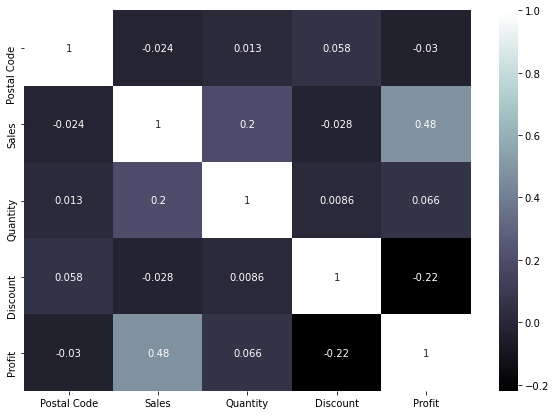

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(corremat, cmap='bone', annot=True)

In [ ]:
'''
The correlation matrix shows that sales parameter
is the most close related parameter to profit
'''

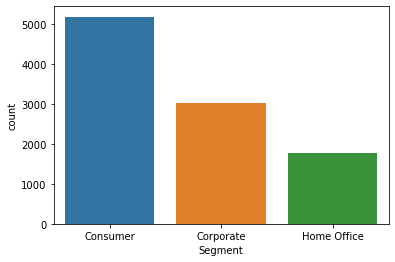

In [6]:
sns.countplot(x='Segment',data=df)

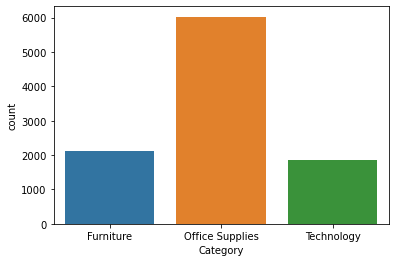

In [7]:
sns.countplot(x='Category',data=df)

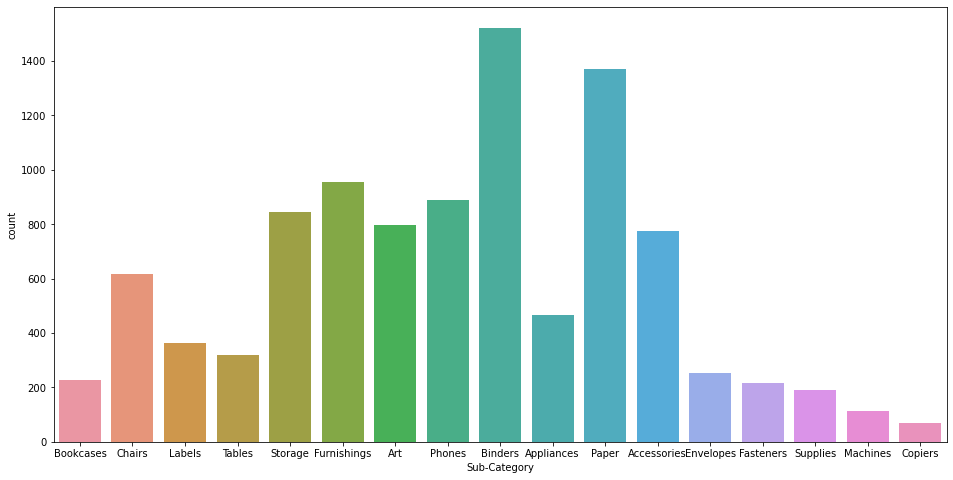

In [8]:
fig_dims = (16,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Sub-Category',data=df,ax= ax)
#Count of each item distributed

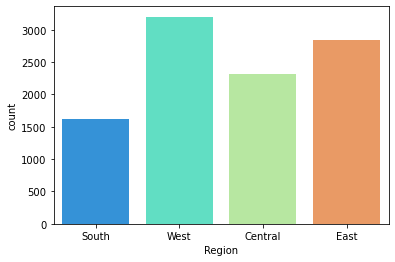

In [9]:
sns.countplot(x='Region',data=df, palette='rainbow')


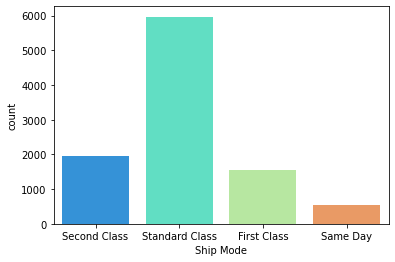

In [10]:
sns.countplot(x='Ship Mode',data=df, palette='rainbow')


California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

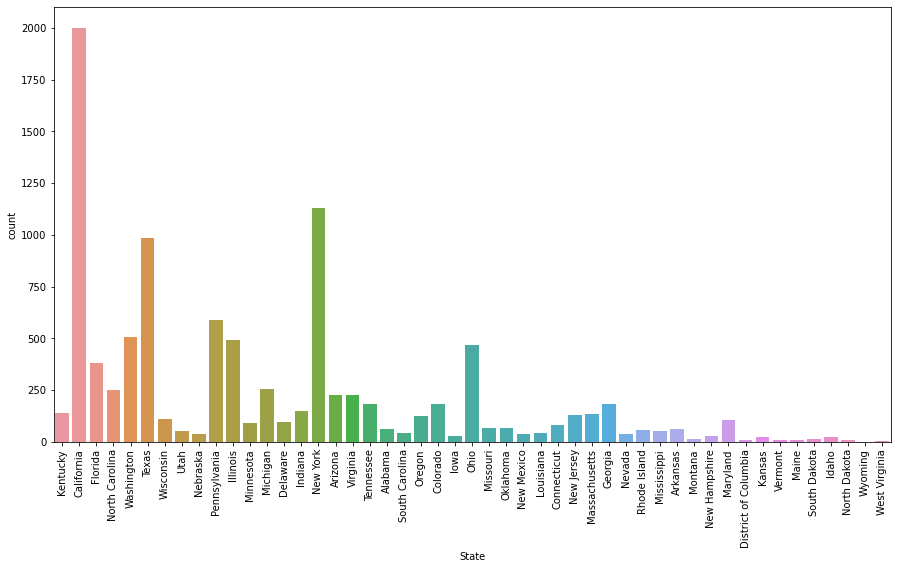

In [11]:
print(df['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.show()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


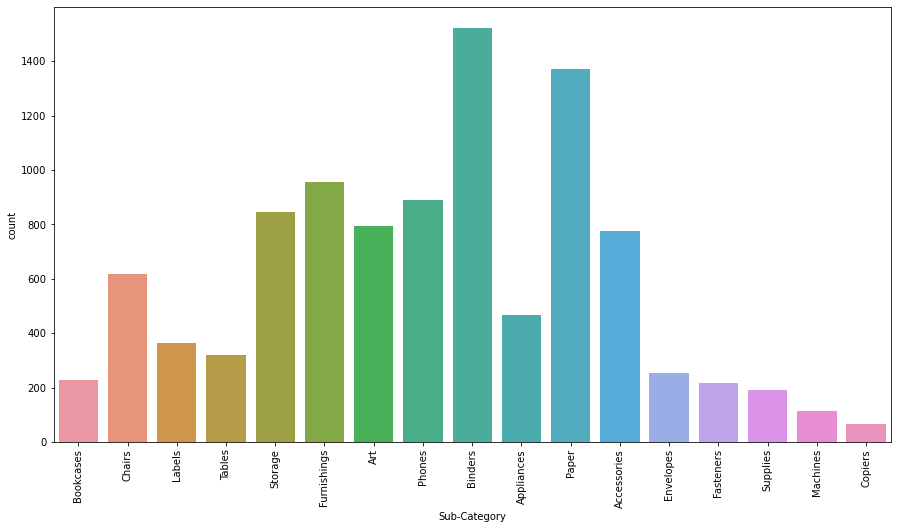

In [21]:
print(df['Sub-Category'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()
#count of items distributed

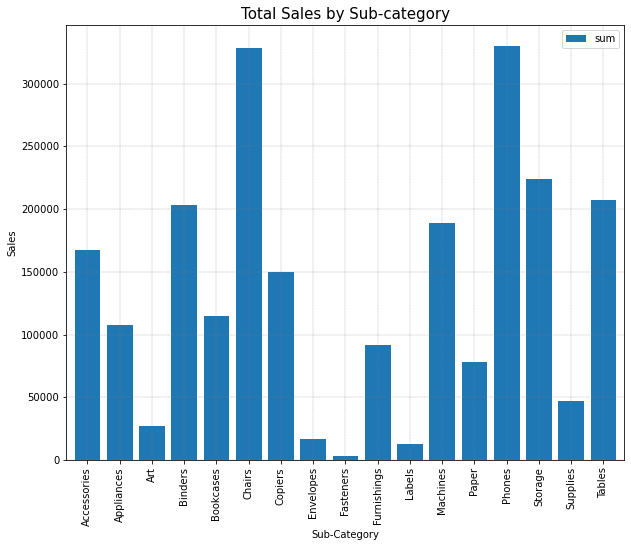

In [19]:
subcat = df.groupby('Sub-Category')['Sales'].agg(['sum'])
subcat.plot.bar(width=0.8,figsize=(10,8))
plt.title('Total Sales by Sub-category',fontsize = 15)
plt.ylabel('Sales')
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

In [ ]:
'''
The sales of chairs and phones is extremly high as compared to other itmes
'''

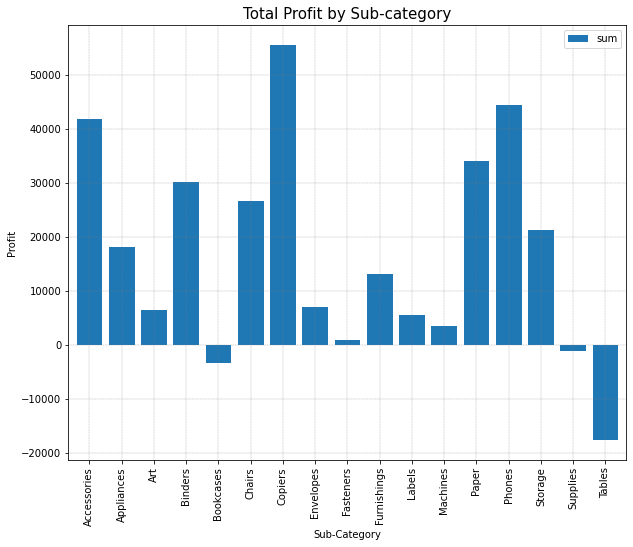

In [21]:
subcat = df.groupby('Sub-Category')['Profit'].agg(['sum'])
subcat.plot.bar(width=0.8,figsize=(10,8))
plt.title('Total Profit by Sub-category',fontsize = 15)
plt.ylabel('Profit')
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

In [ ]:
'''
The maximum profit is due to Copiers.
Tables and Bookcases are causing a lot of loss
'''

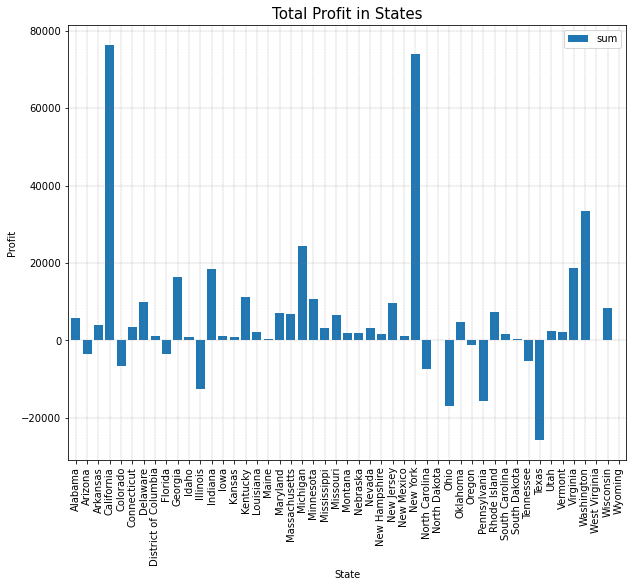

In [86]:
subcat = df.groupby('State')['Profit'].agg(['sum'])
subcat.plot.bar(width=0.8,figsize=(10,8))
plt.title('Total Profit in States',fontsize = 15)
plt.ylabel('Profit')
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

In [ ]:
'''
California and New York are the states having the highest profit
Texas is the lowest among all causing a huge loss
'''

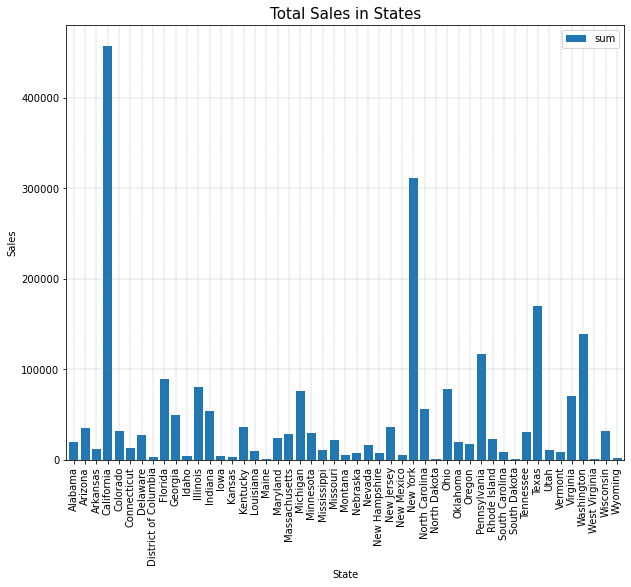

In [23]:
subcat = df.groupby('State')['Sales'].agg(['sum'])
subcat.plot.bar(width=0.8,figsize=(10,8))
plt.title('Total Sales in States',fontsize = 15)
plt.ylabel('Sales')
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

In [ ]:
'''
California has sales more than New York but the profit from
bith the states is comparable
'''

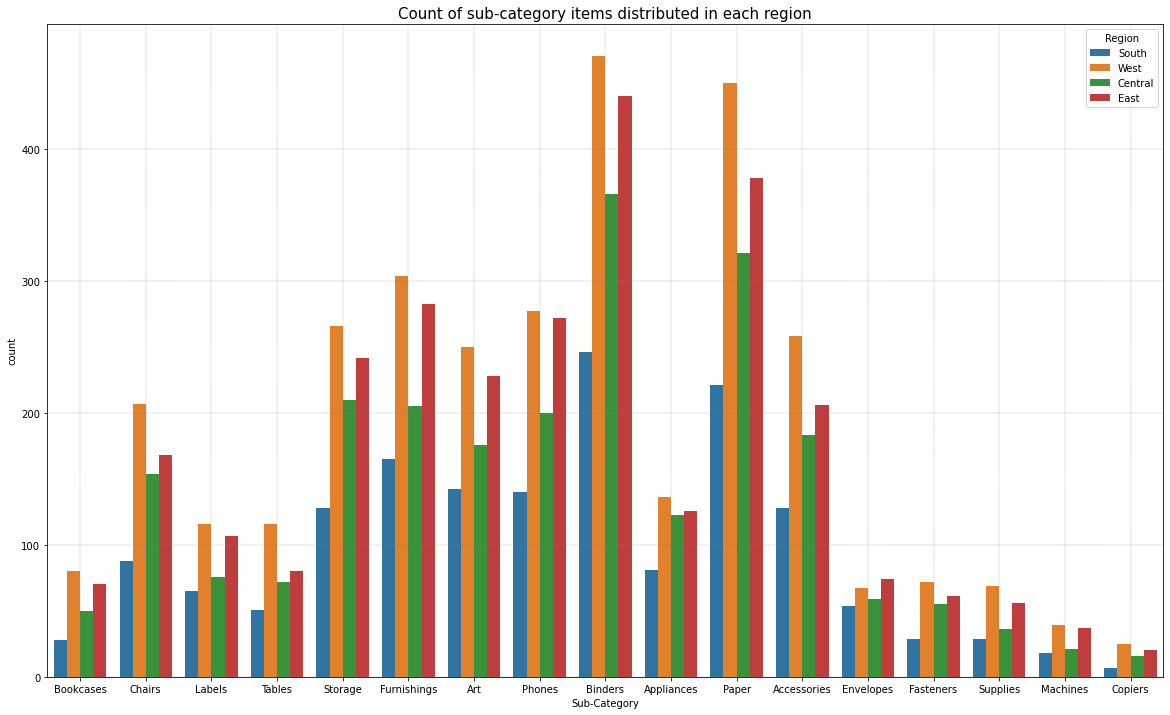

In [85]:
plt.figure(figsize = (20,12))
sns.countplot(data=df, x='Sub-Category', hue='Region')
plt.title("Count of sub-category items distributed in each region", fontsize=15)
plt.grid(color='gray', linestyle='--', linewidth=0.3)